In [241]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json

CFG = json.load(open("./configs/ver5.json"))
# os.listdir("../data/input/")
from model.utils import load_table
train_f, y_train_all = load_table(path="./features/feather/train", load_columns=CFG["columns"], target_name=CFG["target_name"])
test_f = load_table(path="./features/feather/test", load_columns=CFG["columns"])
train = pd.read_csv("./data/input/train.csv")
test  =pd.read_csv("./data/input/test.csv")
sub = pd.read_csv("./data/input/sample_submission.csv")
pred_train = pd.read_feather("./data/output/ver5/LightGBM_train.feather")
pred_test = pd.read_feather("./data/output/ver5/LightGBM_test.feather")

In [243]:
# train["month"] = train.to_datetime(train["Date"]).dt.month
# test["month"] = test.to_datetime(test["Date"]).dt.month
train_f["AveragePrice"] = y_train_all
test_f["AveragePrice"] = pred_test
df = pd.concat([train, test], axis=0)
df_f = pd.concat([train_f, test_f], axis=0)
df_pred = pd.concat([pred_train, pred_test], axis=0)

/Users/takahashikeiji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


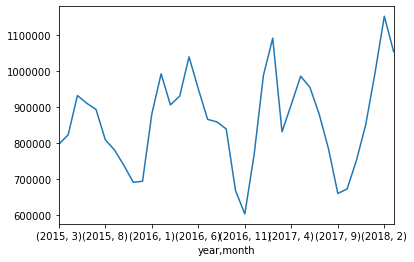

In [244]:
df_f.groupby(["year", "month"]).mean()["Total Volume"].plot()

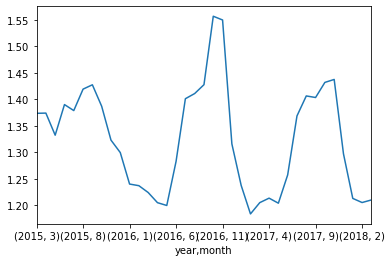

In [245]:
df_f.groupby(["year", "month"]).mean()["AveragePrice"].plot()

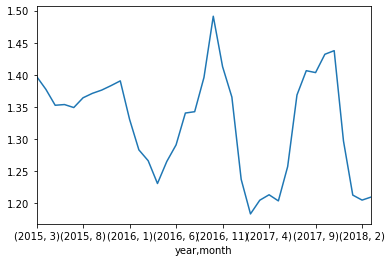

In [251]:
train_f["AveragePrice"] = pred_train
df_f = pd.concat([train_f, test_f], axis=0)

df_f.groupby(["year", "month"]).mean()["AveragePrice"].plot()